#<font color = 'shade'> **HW4 part 2 (14 Points): Required Submissions:**</font>
1.  Submit  colab/jupyter notebooks.
2. Pdf version of the notebooks (HWs will not be graded if pdf version is not provided).
3. **The notebooks and pdf files should have the output.**
4. **Name files as follows : FirstNameLastName_HW5_part2**

#<font color = 'shade'> **Question1 (6 Points) : Classification on the ‘credit-g’ dataset using KNN Classification**

# <font color = 'shade'>**Import/Install the packages**

In [148]:
if 'google.colab' in str(get_ipython()):
    print('Running on Colab')
else:
    print('Not Running on Colab')

Running on Colab


In [149]:
if 'google.colab' in str(get_ipython()):
  !pip install --upgrade feature_engine scikit-learn -q

In [150]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [151]:
import feature_engine

In [152]:
print(feature_engine.__version__)

1.6.2


In [153]:
import sklearn

In [154]:
print(sklearn.__version__)

1.3.1


In [167]:
"""Importing the required packages"""

# For DataFrames and manipulations
import pandas as pd
import numpy as np

# For data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

# save and load models
import joblib

# Pathlib to navigate file system
from pathlib import Path
import sys

# For splitting the dataset
from sklearn.model_selection import train_test_split

# For categorical variables
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import RareLabelEncoder
from feature_engine.selection import DropFeatures
from sklearn.preprocessing import LabelEncoder

# For scaling the data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# creating pipelines
from sklearn.pipeline import Pipeline

# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV

# Using KNN classification for our data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

# draws a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

# We will use this to download the Dataset
from sklearn.datasets import fetch_openml

# feature engine log transformation
from feature_engine.transformation import LogTransformer
from feature_engine.transformation import YeoJohnsonTransformer

# feature engine wrapper
from feature_engine.wrappers import SklearnTransformerWrapper

# Handling Outliers
from feature_engine.outliers import Winsorizer

# <font color = 'shade'> **Specify Project Folder Location**

In [156]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [157]:
base_folder = Path('/content/drive/MyDrive/BUAN6341/HW4/')

In [11]:
data_folder = base_folder/'datasets'
save_model_folder = base_folder/'models/ml_fall_2022'
custom_function_folder = base_folder/'custom-functions'
save_model_folder.mkdir(exist_ok=True, parents=True)

# <font color = 'shade'> **Import Custom Functions from Python file**

In [12]:
%load_ext autoreload
%autoreload 2

In [13]:
sys.path.append(str(custom_function_folder))

In [14]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/BUAN6341/HW4/custom-functions']

In [15]:
from  plot_learning_curve import plot_learning_curve

In [16]:
from eda_plots import diagnostic_plots, plot_target_by_category

#  <font color ='shade'>**Question2 (14 Points) : KNN Regression on Bike Sharing Dataset**

- Download the data from following link: https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand'




##  <font color ='shade'>**Task1 (6 Points): Do the EDA and identify the preprocessing steps.**

In [17]:
data = pd.read_csv('/content/drive/MyDrive/BUAN6341/HW4/datasets/SeoulBikeData.csv', encoding='latin-1')

In [18]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [19]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

We will drop 'Date', as it is not really necessary for this dataset and model.

In [20]:
# We are dropping Date, as it not necessary for this dataset

data = data.drop('Date', axis=1)

In [21]:
data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


We will select 'X', which will consist of all our independent variables, or features which we will be using to train our model, it will consist of all the columns except for 'Rented Bike Count', as 'Rented Bike Count' will be used as our target variable, which we will predict using our model by training our model.

In [22]:
X = data.iloc[:, 1:]

In [23]:
X.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


We will select 'y', which is our target variable - which will consist of just one feature, which is 'Rented Bike Count'.

In [24]:
y = data.iloc[:,0]

In [25]:
y.head()

0    254
1    204
2    173
3    107
4     78
Name: Rented Bike Count, dtype: int64

Checking first few rows of our dataset

In [26]:
# X consists of my independent variables, i.e, my features I will use to train my model on, and y is dependent variables which I will be predicting.

# Checking the first few rows of the dataset,

X.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [27]:
y.head()

0    254
1    204
2    173
3    107
4     78
Name: Rented Bike Count, dtype: int64

Checking for column names

In [28]:
# Checking for the column names

X.columns

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

Checking for datatypes of the columns

In [29]:
# Checking the datatypes of the columns

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Hour                       8760 non-null   int64  
 1   Temperature(°C)            8760 non-null   float64
 2   Humidity(%)                8760 non-null   int64  
 3   Wind speed (m/s)           8760 non-null   float64
 4   Visibility (10m)           8760 non-null   int64  
 5   Dew point temperature(°C)  8760 non-null   float64
 6   Solar Radiation (MJ/m2)    8760 non-null   float64
 7   Rainfall(mm)               8760 non-null   float64
 8   Snowfall (cm)              8760 non-null   float64
 9   Seasons                    8760 non-null   object 
 10  Holiday                    8760 non-null   object 
 11  Functioning Day            8760 non-null   object 
dtypes: float64(6), int64(3), object(3)
memory usage: 821.4+ KB


In [30]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 8760 entries, 0 to 8759
Series name: Rented Bike Count
Non-Null Count  Dtype
--------------  -----
8760 non-null   int64
dtypes: int64(1)
memory usage: 68.6 KB


Checking for unique values in every columns

In [31]:
# Checking for unique values in every columns

X.nunique()

Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

Checking for summary statistics

In [32]:
# Checking the summary statistics

X.describe().T

,count,mean,std,min,25%,50%,75%,max
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


Checking for duplicate rows

In [33]:
# Checking for duplicate rows

dups = X.duplicated()

print(dups.any())

False


Checking for missing values

In [34]:
# Checking for missing values

X.isnull().sum()

Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [35]:
X.isnull().any()

Hour                         False
Temperature(°C)              False
Humidity(%)                  False
Wind speed (m/s)             False
Visibility (10m)             False
Dew point temperature(°C)    False
Solar Radiation (MJ/m2)      False
Rainfall(mm)                 False
Snowfall (cm)                False
Seasons                      False
Holiday                      False
Functioning Day              False
dtype: bool

In [36]:
X.isnull().mean() * 100

Hour                         0.0
Temperature(°C)              0.0
Humidity(%)                  0.0
Wind speed (m/s)             0.0
Visibility (10m)             0.0
Dew point temperature(°C)    0.0
Solar Radiation (MJ/m2)      0.0
Rainfall(mm)                 0.0
Snowfall (cm)                0.0
Seasons                      0.0
Holiday                      0.0
Functioning Day              0.0
dtype: float64

Finding out Categorical, Discrete, and Numeric/Continous variables in our dataset

In [37]:
# Let's differentiate between continuous/numeric, discrete, and categorical variables

categorical = [var for var in X.columns if X[var].dtype.name == 'object']

discrete = [
    var for var in X.columns if X[var].dtype.name != 'object'
    and len(X[var].unique()) < 20
]

# Create a list of continuous Variables
continuous = [
    var for var in X.columns if X[var].dtype.name != 'object'
    if var not in discrete
]

In [38]:
categorical

['Seasons', 'Holiday', 'Functioning Day']

In [115]:
discrete

[]

In [39]:
continuous

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

Unique values for Categorical variables

In [40]:
# We will now find out unique values for variables

# For categorical variables

total_unique_values= X[categorical].nunique()
for key,value in total_unique_values.items():
    if value >0:
        print(key,":",value)

Seasons : 4
Holiday : 2
Functioning Day : 2


In [41]:
for var in categorical:
    print(var, X[var].unique(), '\n')

Seasons ['Winter' 'Spring' 'Summer' 'Autumn'] 

Holiday ['No Holiday' 'Holiday'] 

Functioning Day ['Yes' 'No'] 



Unique values in Continous variables

In [42]:
# For continous variables

total_unique_values= X[continuous].nunique()
for key,value in total_unique_values.items():
    if value >0:
        print(key,":",value)

Hour : 24
Temperature(°C) : 546
Humidity(%) : 90
Wind speed (m/s) : 65
Visibility (10m) : 1789
Dew point temperature(°C) : 556
Solar Radiation (MJ/m2) : 345
Rainfall(mm) : 61
Snowfall (cm) : 51


In [43]:
for var in continuous:
    print(var, X[var].unique()[0:20], '\n')

Hour [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] 

Temperature(°C) [-5.2 -5.5 -6.  -6.2 -6.4 -6.6 -7.4 -7.6 -6.5 -3.5 -0.5  1.7  2.4  3.
  2.1  1.2  0.8  0.6  0.  -0.3] 

Humidity(%) [37 38 39 40 36 35 27 24 21 23 25 26 54 58 66 77 79 81 83 84] 

Wind speed (m/s) [2.2 0.8 1.  0.9 2.3 1.5 1.3 1.1 0.5 1.2 1.4 1.6 2.  3.2 4.2 1.7 0.6 2.1
 2.5 1.8] 

Visibility (10m) [2000 1928 1996 1936  793 1913 1687 1380 1265  994  990 1256 1221 1167
 1202 1178 1276 1436 1487 1309] 

Dew point temperature(°C) [-17.6 -17.7 -18.6 -18.7 -19.5 -19.3 -19.8 -22.4 -21.2 -20.2 -17.2 -15.6
 -14.6 -11.4  -7.   -6.5  -5.   -3.5  -3.6  -3.4] 

Solar Radiation (MJ/m2) [0.   0.01 0.23 0.65 0.94 1.11 1.16 1.01 0.54 0.24 0.08 0.3  0.8  1.
 1.09 1.12 0.99 0.74 0.22 0.06] 

Rainfall(mm) [0.  0.5 1.  2.5 0.1 0.2 0.3 0.7 1.6 0.4 1.1 6.4 9.5 3.5 0.9 3.3 1.4 1.5
 3.7 4.5] 

Snowfall (cm) [0.  0.1 0.3 0.4 0.2 1.  0.9 0.8 0.7 0.6 2.7 4.  4.1 4.3 3.9 3.1 2.1 1.4
 0.5 1.3] 



Frequency Distribution of Categorical variables

In [44]:
# Checking frequency distribution of categorical variables

def check_rare(var):
  cat_freq = 100 * X[var].value_counts(normalize=True)
  fig = cat_freq.sort_values(ascending=False).plot.bar()
  fig.axhline(y=5, color='red')
  fig.set_ylabel('category percentage frequency')
  fig.set_xlabel(var)
  fig.set_title('Identifying Rare Categories')
  plt.show()

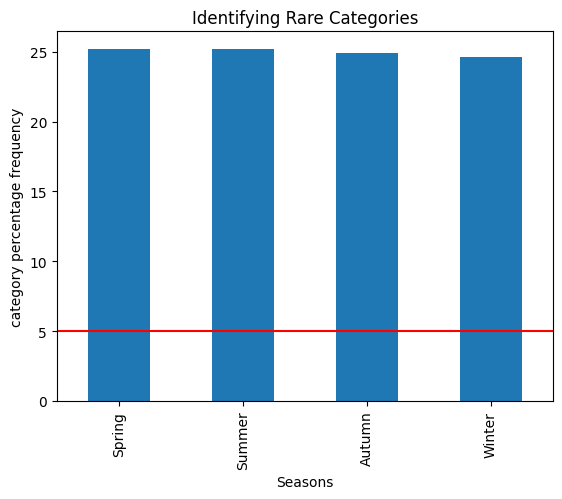

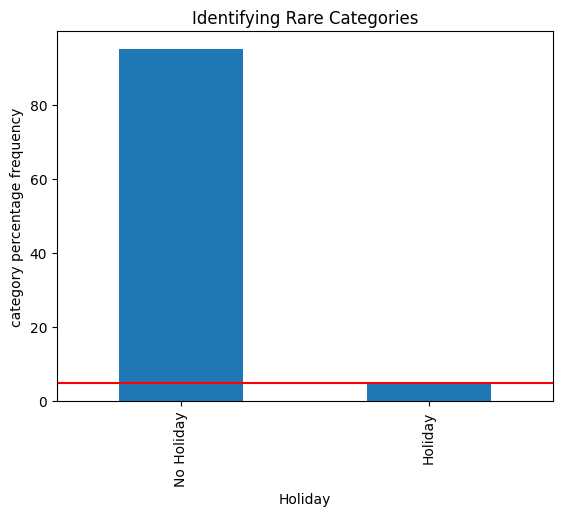

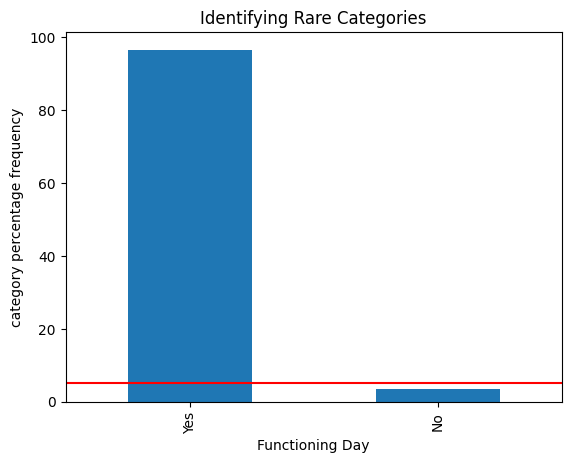

In [45]:
for var in categorical:
  check_rare(var)

From the above charts we can see that Functioning Data consists of rare values, and we can apply Rare Label Encoding technique to Functioning Day

Distribution of Continuous variables

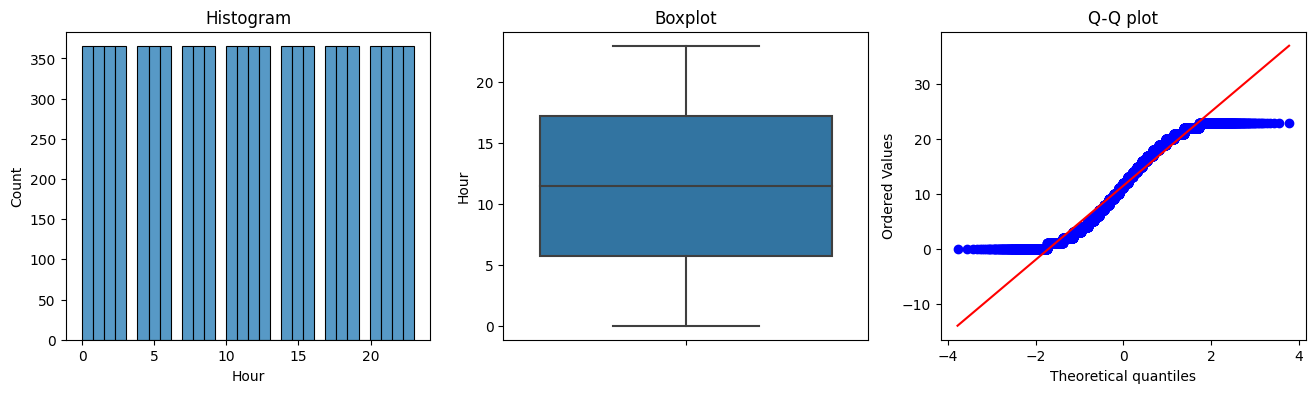

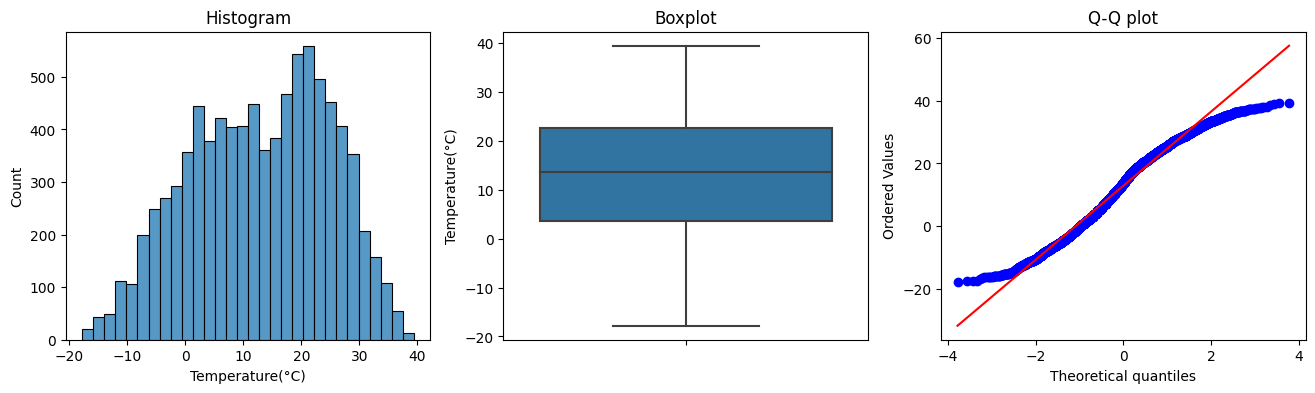

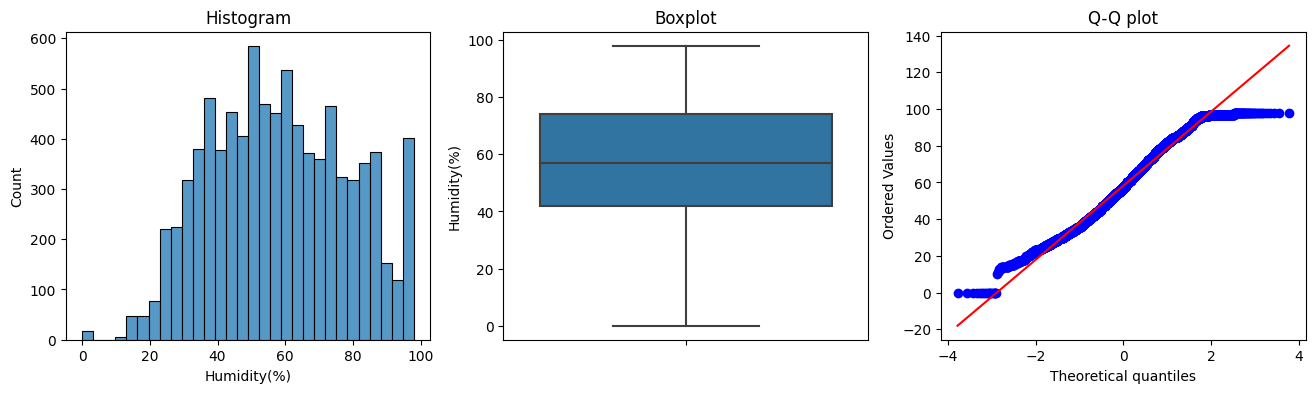

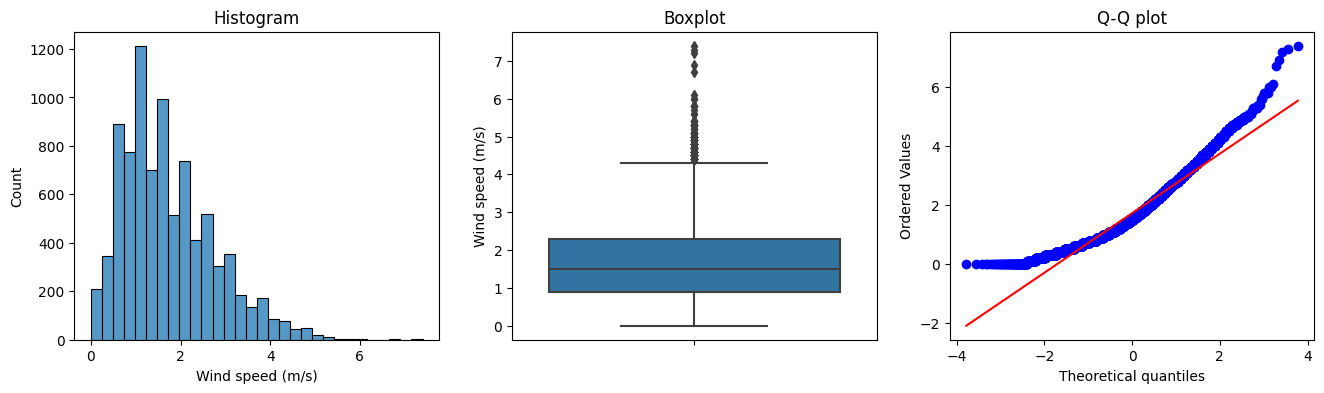

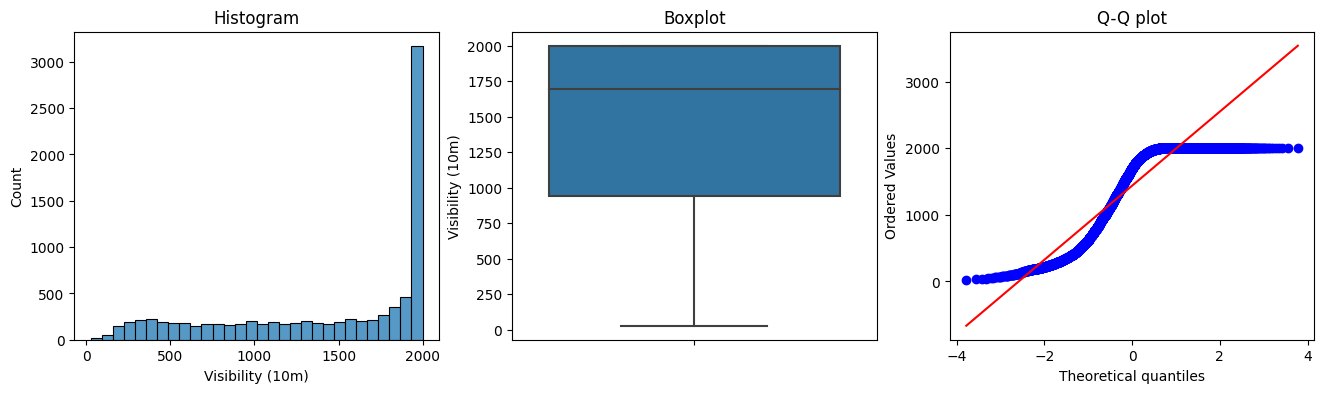

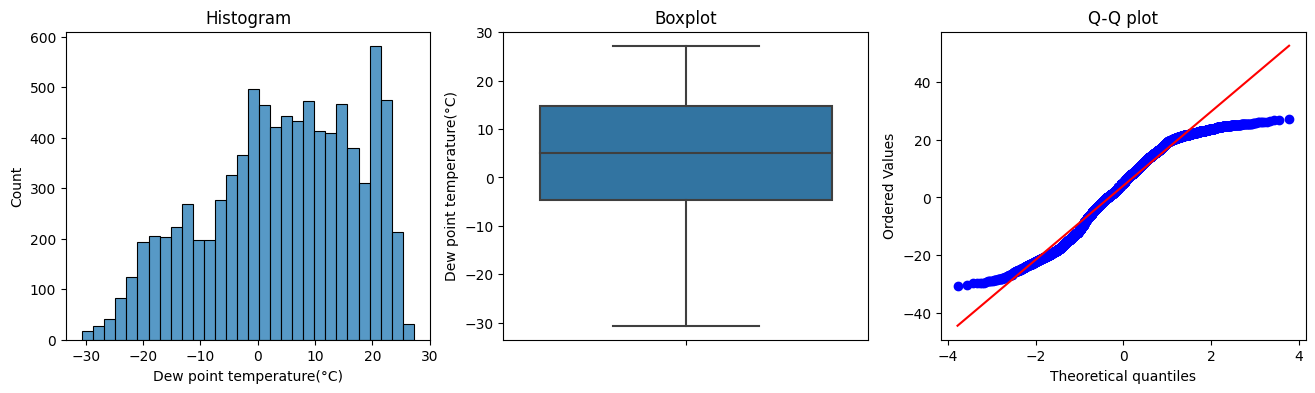

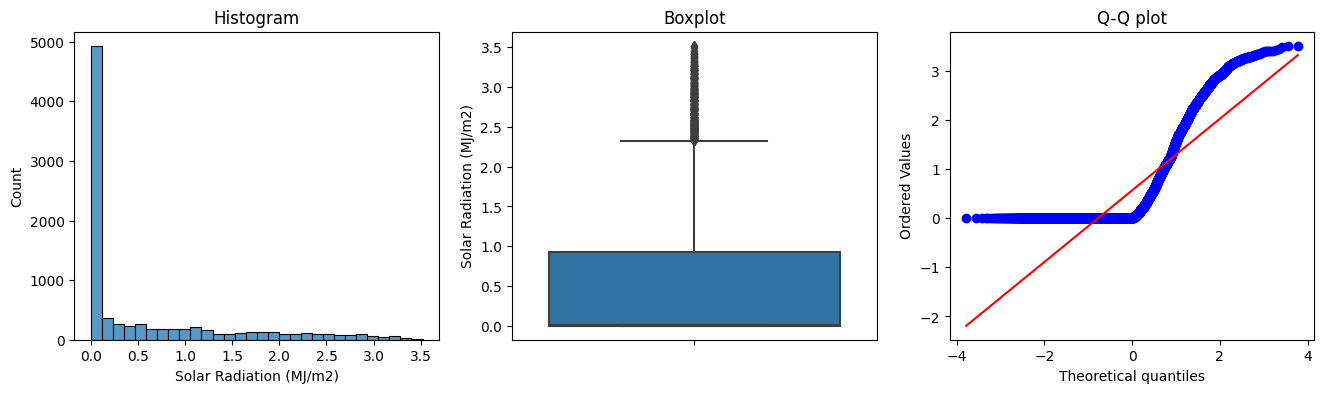

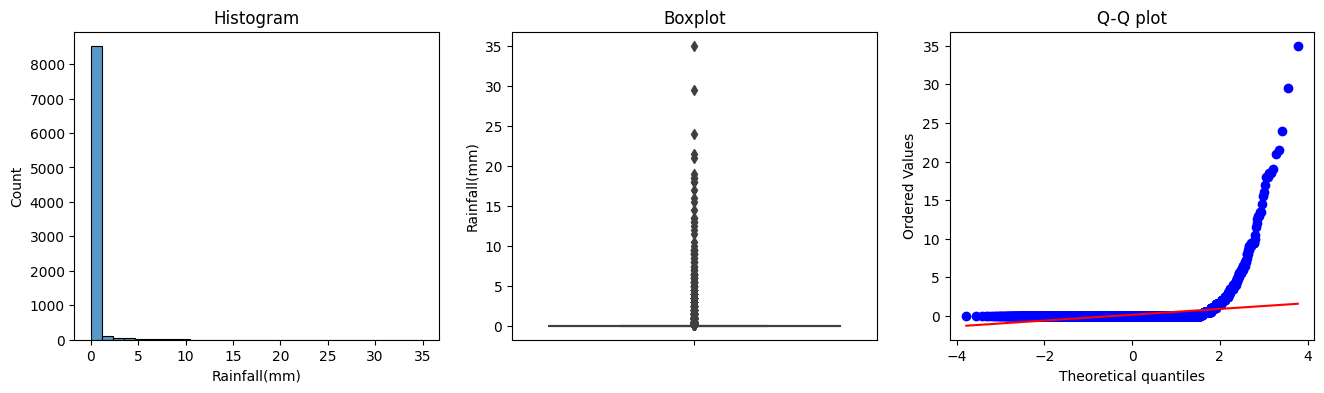

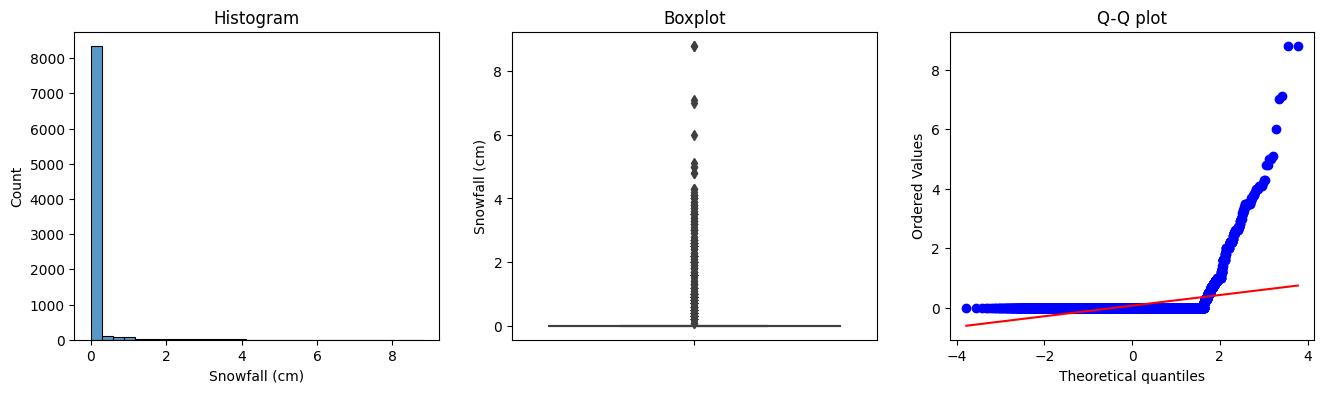

In [46]:
# Distribution of continuous variables

for var in continuous:
    diagnostic_plots(X, var)

We can see that Wind Speed, Visibility, Solar Radiation, Rainfall, and Snowfall have a skewed distribution. Solar Radiation, Rainfall, and Snowfall all contain outliers. In order to address the non-normal, ie, skewed distribution we can use log transformation, and we can use either Discreteization or Winsorization technique to address the outliers.

Plotting heatmap to find the correlation between independent continous variables

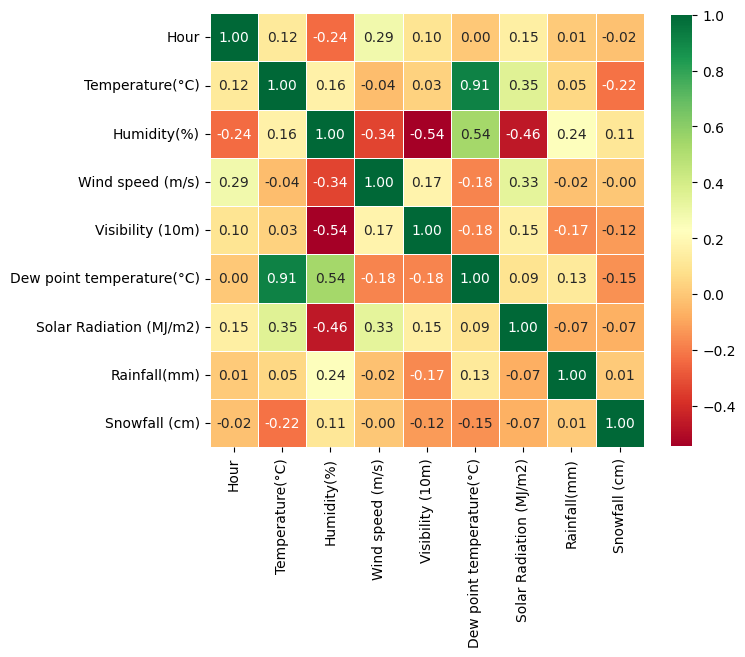

In [47]:
corrmat = X[continuous].corr().round(2)
top_corr_features = corrmat.index
plt.figure(figsize=(7, 7))
sns.heatmap(X[top_corr_features].corr(),annot=True, square=True, fmt='.2f',
            cbar_kws={"shrink": .80}, linewidths=.5, cmap='RdYlGn');

- From the correlation matrix we can see that, Humidity and Visibility have a high negative correlation.
- Temprature and Dew Point Temprature also have a very high positive correlation.
- Finally, Solar Radiation and Humidity have a high negative correlation amongst each other.

# Conclusions from EDA (Exploratory Data Analysis)

- We don't have any null/missing values in our dataset, so no need to any imputation techniques.
- We don't have any dupliated values in our dataset, so no need to drop or address them.
- We have 3 categorical variables, 'Seasons', 'Holiday', and 'Functioning Day', out of which, 'Functioning Day' - is rare variable. So we will use OneHotEncoder() for 'Seasons', and 'Holiday'. And RareLabelEncoder() for 'Functioning Day'.
- We have skewed distribution for 'Wind Speed', 'Visibility', 'Solar Radiation', 'Rainfall', and 'Snowfall'. We will try and use Yeo Johnson Transformer to convert these distributions, we cannot use Log Transformation as there are some values in those columns which have 0 as values in them, and Log Transformation doesn't work with 0 and negative values.
- We have outliers in 'Wind Speed', 'Solar Radiation', 'Rainfall', 'Snowfall', we will use Winsorization technique to deal with the outliers.
- We have high positive correlation between Temprature and Dew point temprature, so we will drop Dew Point Temprature feature from our model.





##  <font color ='shade'>**Task2:(8 Points) : Create a pipeline of regressor and preprocessing steps**
In this HW you will use KNNRegression. Use gridserach to fine tune your pipeline. The aim of the piepline is to predict the rented bike count.

First of all, we will split the dataset in train and test

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [49]:
X.columns

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

# Round 1

In [50]:
columns_to_drop = ['Dew point temperature(°C)']
one_hot_encoder_cols = ['Seasons', 'Holiday', 'Functioning Day']
rare_label_encoder_cols = ['Functioning Day']
yeo_transformer_cols = ['Visibility (10m)', 'Wind speed (m/s)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

preprocessing_steps = Pipeline([
    ('drop_features', DropFeatures(columns_to_drop)),
    ('rare_label_encoder', RareLabelEncoder(tol=0.05, n_categories=2, variables=rare_label_encoder_cols)),
    ('one_hot_encoder', OneHotEncoder(variables = one_hot_encoder_cols, drop_last=True, ignore_format=True)),
    ('yeo_tranformer', YeoJohnsonTransformer(variables=yeo_transformer_cols)),
    ('knn_regressor', KNeighborsRegressor())
])

In [51]:
param_grid_1 = {
    'knn_regressor__n_neighbors': range(1, 11, 1)
}

regressor_grid_1 = GridSearchCV(preprocessing_steps, param_grid=param_grid_1, cv=5, return_train_score=True)

In [52]:
regressor_grid_1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable Functioning Day is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable Functioning Day is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable Functioning Day is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable Functioning Day is less than that indicated in n_catego

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('drop_features',
                                        DropFeatures(features_to_drop=['Dew '
                                                                       'point '
                                                                       'temperature(°C)'])),
                                       ('rare_label_encoder',
                                        RareLabelEncoder(n_categories=2,
                                                         variables=['Functioning '
                                                                    'Day'])),
                                       ('one_hot_encoder',
                                        OneHotEncoder(drop_last=True,
                                                      ignore_format=True,
                                                      variables=['Seasons',
                                                                 'Holiday',
                                                                 'Functioning '
                                                                 'Day'])),
                                       ('yeo_tranformer',
                                        YeoJohnsonTransformer(variables=['Visibility '
                                                                         '(10m)',
                                                                         'Wind '
                                                                         'speed '
                                                                         '(m/s)',
                                                                         'Solar '
                                                                         'Radiation '
                                                                         '(MJ/m2)',
                                                                         'Rainfall(mm)',
                                                                         'Snowfall '
                                                                         '(cm)'])),
                                       ('knn_regressor',
                                        KNeighborsRegressor())]),
             param_grid={'knn_regressor__n_neighbors': range(1, 11)},
             return_train_score=True)

In [53]:
print(regressor_grid_1.best_params_)

{'knn_regressor__n_neighbors': 6}


In [54]:
# specify the file to save the best estimator
file_best_estimator_round1 = save_model_folder / 'knn_regressor_round1_best_estimator.pkl'

# specify the file to save complete grid results
file_complete_grid_round1 = save_model_folder / 'knn_regressor_round1_complete_grid.pkl'

In [55]:
joblib.dump(regressor_grid_1.best_estimator_, file_best_estimator_round1)

joblib.dump(regressor_grid_1, file_complete_grid_round1)

['/content/drive/MyDrive/BUAN6341/HW4/models/ml_fall_2022/knn_regressor_round1_complete_grid.pkl']

In [56]:
loaded_best_estimator_round1 = joblib.load(file_best_estimator_round1)

loaded_complete_grid_round1 = joblib.load(file_complete_grid_round1)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

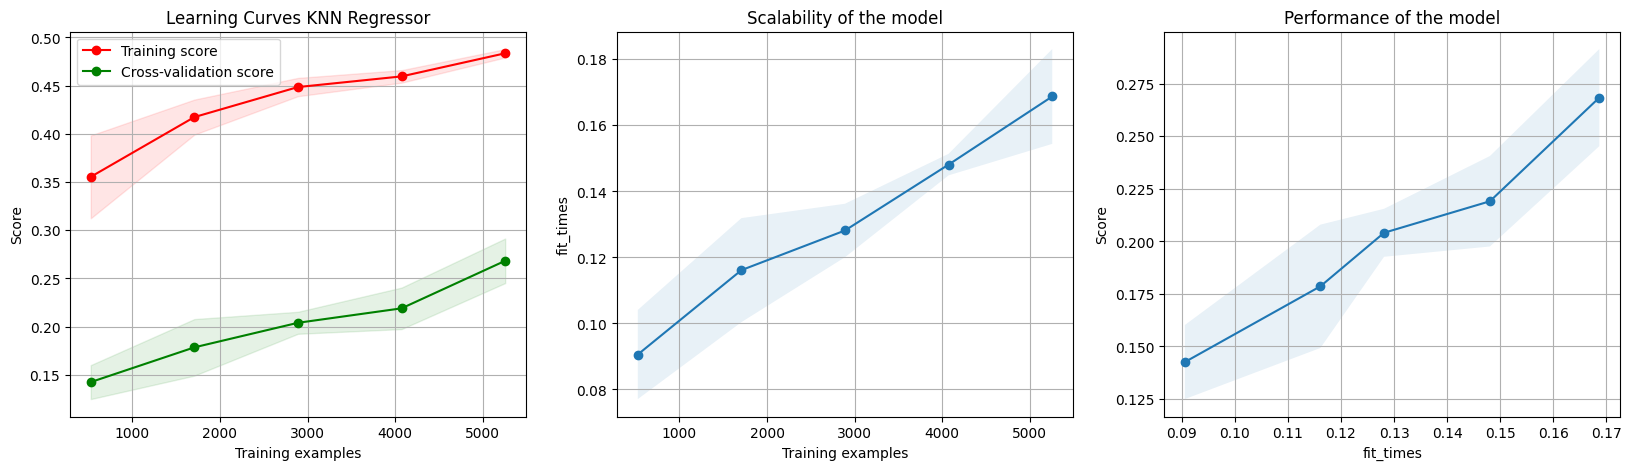

In [59]:
plot_learning_curve(loaded_best_estimator_round1, 'Learning Curves KNN Regressor', X_train, y_train, n_jobs=-1)

In [60]:
print(loaded_best_estimator_round1.score(X_train, y_train))


print(loaded_complete_grid_round1.best_score_)

0.5000864961576463
0.26832413467381455


# Round 2

In [117]:
one_hot_encoder_cols = ['Seasons', 'Holiday', 'Functioning Day']
rare_label_encoder_cols = ['Functioning Day']
yeo_transformer_cols = ['Visibility (10m)', 'Wind speed (m/s)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

preprocessing_steps_2 = Pipeline([
    ('rare_label_encoder', RareLabelEncoder(tol=0.05, variables=rare_label_encoder_cols)),
    ('one_hot_encoder', OneHotEncoder(variables = one_hot_encoder_cols, drop_last=True, ignore_format=True)),
    ('yeo_tranformer', YeoJohnsonTransformer(variables=yeo_transformer_cols)),
    ('scalar', SklearnTransformerWrapper(StandardScaler(), variables=continuous)),
    ('knn_regressor', KNeighborsRegressor())
])

In [118]:
param_grid_2 = {
    'knn_regressor__n_neighbors': range(5, 15, 1)
}

regressor_grid_2 = GridSearchCV(preprocessing_steps_2, param_grid=param_grid_2, cv=5, return_train_score=True)

In [119]:
regressor_grid_2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable Functioning Day is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable Functioning Day is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable Functioning Day is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable Functioning Day is less than that indicated in n_catego

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rare_label_encoder',
                                        RareLabelEncoder(variables=['Functioning '
                                                                    'Day'])),
                                       ('one_hot_encoder',
                                        OneHotEncoder(drop_last=True,
                                                      ignore_format=True,
                                                      variables=['Seasons',
                                                                 'Holiday',
                                                                 'Functioning '
                                                                 'Day'])),
                                       ('yeo_tranformer',
                                        YeoJohnsonTransformer(variables=['Visibility '
                                                                         '(10m)',
                                                                         'Wind '
                                                                         'speed '
                                                                         '(m/s)',
                                                                         'Solar '
                                                                         'Radiation '
                                                                         '(MJ...
                                        SklearnTransformerWrapper(transformer=StandardScaler(),
                                                                  variables=['Hour',
                                                                             'Temperature(°C)',
                                                                             'Humidity(%)',
                                                                             'Wind '
                                                                             'speed '
                                                                             '(m/s)',
                                                                             'Visibility '
                                                                             '(10m)',
                                                                             'Dew '
                                                                             'point '
                                                                             'temperature(°C)',
                                                                             'Solar '
                                                                             'Radiation '
                                                                             '(MJ/m2)',
                                                                             'Rainfall(mm)',
                                                                             'Snowfall '
                                                                             '(cm)'])),
                                       ('knn_regressor',
                                        KNeighborsRegressor())]),
             param_grid={'knn_regressor__n_neighbors': range(5, 15)},
             return_train_score=True)

In [120]:
print(regressor_grid_2.best_params_)

{'knn_regressor__n_neighbors': 5}


In [121]:
file_best_estimator_round2 = save_model_folder / 'knn_regressor_2_best_estimator.pkl'

# specify the file to save complete grid results
file_complete_grid_round2 = save_model_folder / 'knn_regressor_2_complete_grid.pkl'

In [122]:
joblib.dump(regressor_grid_2.best_estimator_, file_best_estimator_round2)

# save complete grid results
joblib.dump(regressor_grid_2, file_complete_grid_round2)

['/content/drive/MyDrive/BUAN6341/HW4/models/ml_fall_2022/knn_regressor_2_complete_grid.pkl']

In [123]:
loaded_best_estimator_round2 = joblib.load(file_best_estimator_round2)

# load complete grid results
loaded_complete_grid_round2 = joblib.load(file_complete_grid_round2)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

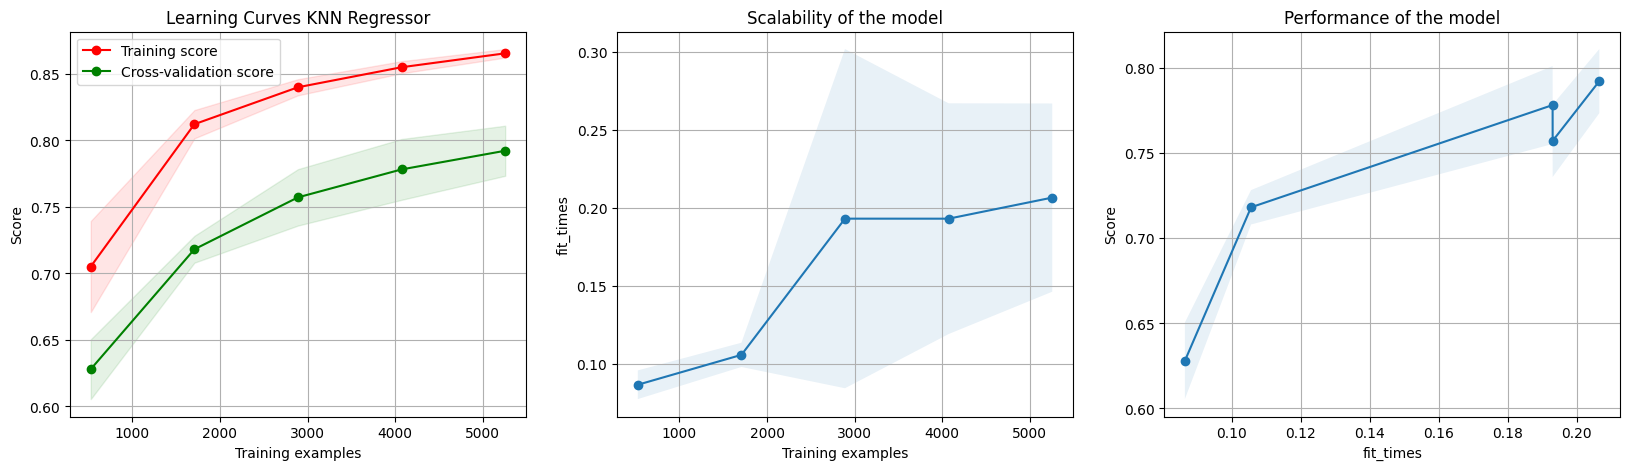

In [124]:
plot_learning_curve(loaded_best_estimator_round2, 'Learning Curves KNN Regressor', X_train, y_train, n_jobs=-1)

In [125]:
print(loaded_best_estimator_round2.score(X_train, y_train))


print(loaded_complete_grid_round2.best_score_)

0.8717502545165279
0.7921184640270111


In [77]:
X.columns

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

# Round 3

In [81]:
one_hot_encoder_cols = ['Seasons', 'Holiday', 'Functioning Day']
rare_label_encoder_cols = ['Functioning Day']
outlier_cols = ['Wind speed (m/s)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
yeo_transformer_cols = ['Visibility (10m)', 'Wind speed (m/s)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

preprocessing_steps_3 = Pipeline([
    ('rare_label_encoder', RareLabelEncoder(tol=0.05, n_categories=2, variables=rare_label_encoder_cols)),
    ('one_hot_encoder', OneHotEncoder(variables = one_hot_encoder_cols, drop_last=True, ignore_format=True)),
    ('yeo_tranformer', YeoJohnsonTransformer(variables=yeo_transformer_cols)),
    ('outlier', Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=outlier_cols)),
    ('scalar', SklearnTransformerWrapper(StandardScaler(), variables=continuous)),
    ('knn_regressor', KNeighborsRegressor())
])

In [82]:
param_grid_3 = {
    'knn_regressor__n_neighbors': range(5, 15, 1)
}

regressor_grid_3 = GridSearchCV(preprocessing_steps_3, param_grid=param_grid_3, cv=5, return_train_score=True)

In [83]:
regressor_grid_3.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable Functioning Day is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable Functioning Day is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable Functioning Day is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable Functioning Day is less than that indicated in n_catego

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rare_label_encoder',
                                        RareLabelEncoder(n_categories=2,
                                                         variables=['Functioning '
                                                                    'Day'])),
                                       ('one_hot_encoder',
                                        OneHotEncoder(drop_last=True,
                                                      ignore_format=True,
                                                      variables=['Seasons',
                                                                 'Holiday',
                                                                 'Functioning '
                                                                 'Day'])),
                                       ('yeo_tranformer',
                                        YeoJohnsonTransformer(variables=['Visibility '
                                                                         '(10m)',
                                                                         'Wind '
                                                                         'speed '
                                                                         '(m/s)',
                                                                         'Solar '...
                                        SklearnTransformerWrapper(transformer=StandardScaler(),
                                                                  variables=['Hour',
                                                                             'Temperature(°C)',
                                                                             'Humidity(%)',
                                                                             'Wind '
                                                                             'speed '
                                                                             '(m/s)',
                                                                             'Visibility '
                                                                             '(10m)',
                                                                             'Dew '
                                                                             'point '
                                                                             'temperature(°C)',
                                                                             'Solar '
                                                                             'Radiation '
                                                                             '(MJ/m2)',
                                                                             'Rainfall(mm)',
                                                                             'Snowfall '
                                                                             '(cm)'])),
                                       ('knn_regressor',
                                        KNeighborsRegressor())]),
             param_grid={'knn_regressor__n_neighbors': range(5, 15)},
             return_train_score=True)

In [84]:
print(regressor_grid_3.best_params_)

{'knn_regressor__n_neighbors': 5}


In [85]:
file_best_estimator_round3 = save_model_folder / 'knn_regressor_3_best_estimator.pkl'

# specify the file to save complete grid results
file_complete_grid_round3 = save_model_folder / 'knn_regressor_3_complete_grid.pkl'

In [86]:
joblib.dump(regressor_grid_3.best_estimator_, file_best_estimator_round3)

# save complete grid results
joblib.dump(regressor_grid_3, file_complete_grid_round3)

['/content/drive/MyDrive/BUAN6341/HW4/models/ml_fall_2022/knn_regressor_3_complete_grid.pkl']

In [87]:
loaded_best_estimator_round3 = joblib.load(file_best_estimator_round3)

# load complete grid results
loaded_complete_grid_round3 = joblib.load(file_complete_grid_round3)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

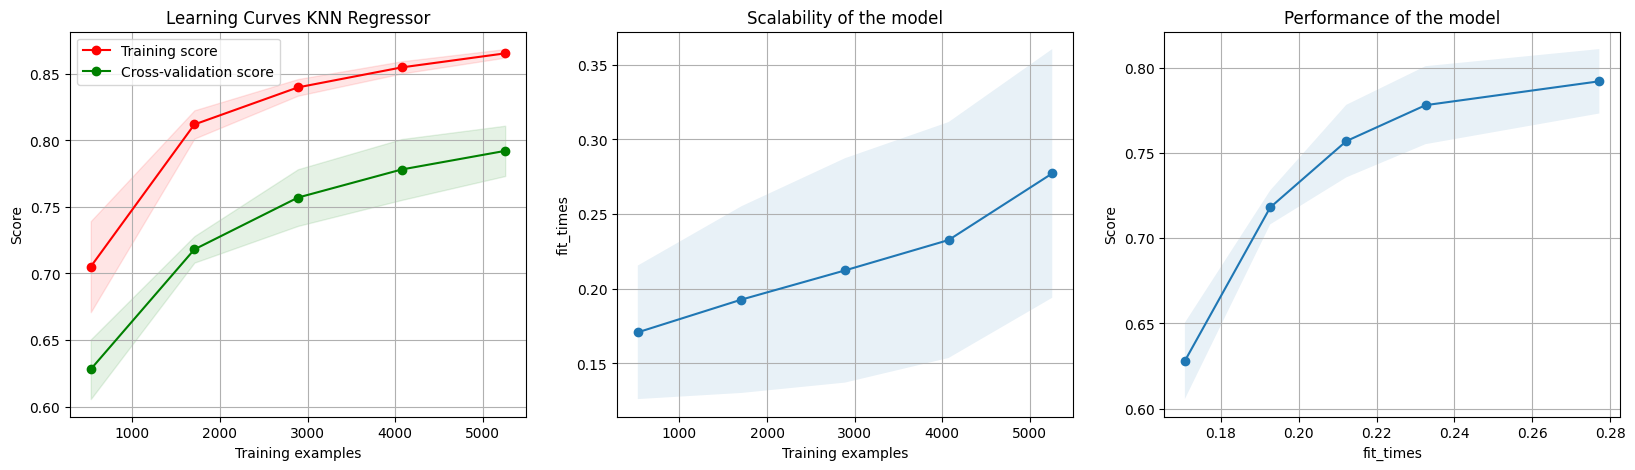

In [88]:
plot_learning_curve(loaded_best_estimator_round3, 'Learning Curves KNN Regressor', X_train, y_train, n_jobs=-1)

In [89]:
print(loaded_best_estimator_round3.score(X_train, y_train))


print(loaded_complete_grid_round3.best_score_)

0.8716686891677572
0.7921364032561691


# Round 4

In [158]:
one_hot_encoder_cols = ['Seasons', 'Holiday', 'Functioning Day']
rare_label_encoder_cols = ['Functioning Day']
outlier_cols = ['Wind speed (m/s)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

preprocessing_steps_4 = Pipeline([
    ('rare_label_encoder', RareLabelEncoder(tol=0.05, n_categories=2, variables=rare_label_encoder_cols)),
    ('one_hot_encoder', OneHotEncoder(variables = one_hot_encoder_cols, drop_last=True, ignore_format=True)),
    ('yeo_tranformer', YeoJohnsonTransformer(variables=continuous)),
    ('outlier', Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=outlier_cols)),
    ('scalar', SklearnTransformerWrapper(StandardScaler(), variables=continuous)),
    ('knn_regressor', KNeighborsRegressor())
])

In [159]:
param_grid_4 = {
    'knn_regressor__n_neighbors': range(5, 15, 1)
}

regressor_grid_4 = GridSearchCV(preprocessing_steps_4, param_grid=param_grid_4, cv=5, return_train_score=True)

In [160]:
regressor_grid_4.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable Functioning Day is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable Functioning Day is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable Functioning Day is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable Functioning Day is less than that indicated in n_catego

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rare_label_encoder',
                                        RareLabelEncoder(n_categories=2,
                                                         variables=['Functioning '
                                                                    'Day'])),
                                       ('one_hot_encoder',
                                        OneHotEncoder(drop_last=True,
                                                      ignore_format=True,
                                                      variables=['Seasons',
                                                                 'Holiday',
                                                                 'Functioning '
                                                                 'Day'])),
                                       ('yeo_tranformer',
                                        YeoJohnsonTransformer(variables=['Hour',
                                                                         'Temperature(°C)',
                                                                         'Humidity(%)',
                                                                         'Wind '
                                                                         'sp...
                                        SklearnTransformerWrapper(transformer=StandardScaler(),
                                                                  variables=['Hour',
                                                                             'Temperature(°C)',
                                                                             'Humidity(%)',
                                                                             'Wind '
                                                                             'speed '
                                                                             '(m/s)',
                                                                             'Visibility '
                                                                             '(10m)',
                                                                             'Dew '
                                                                             'point '
                                                                             'temperature(°C)',
                                                                             'Solar '
                                                                             'Radiation '
                                                                             '(MJ/m2)',
                                                                             'Rainfall(mm)',
                                                                             'Snowfall '
                                                                             '(cm)'])),
                                       ('knn_regressor',
                                        KNeighborsRegressor())]),
             param_grid={'knn_regressor__n_neighbors': range(5, 15)},
             return_train_score=True)

In [161]:
print(regressor_grid_4.best_params_)

{'knn_regressor__n_neighbors': 5}


In [162]:
file_best_estimator_round4 = save_model_folder / 'knn_regressor_4_best_estimator.pkl'

# specify the file to save complete grid results
file_complete_grid_round4 = save_model_folder / 'knn_regressor_4_complete_grid.pkl'

In [163]:
joblib.dump(regressor_grid_4.best_estimator_, file_best_estimator_round4)

# save complete grid results
joblib.dump(regressor_grid_4, file_complete_grid_round4)

['/content/drive/MyDrive/BUAN6341/HW4/models/ml_fall_2022/knn_regressor_4_complete_grid.pkl']

In [164]:
loaded_best_estimator_round4 = joblib.load(file_best_estimator_round4)

# load complete grid results
loaded_complete_grid_round4 = joblib.load(file_complete_grid_round4)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

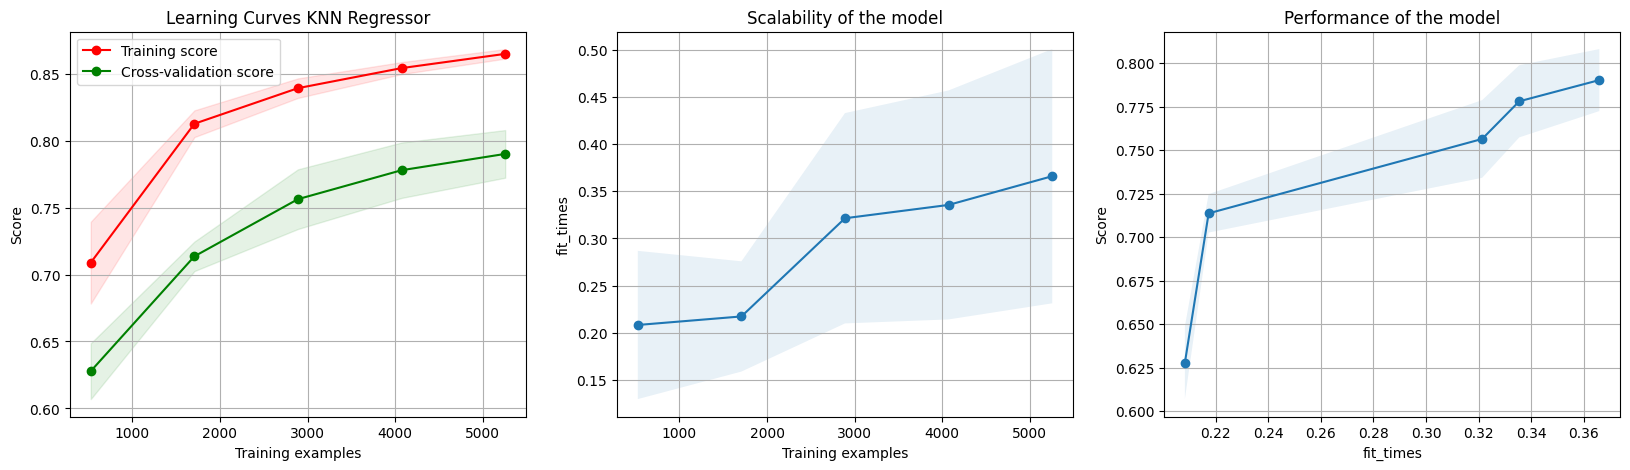

In [165]:
plot_learning_curve(loaded_best_estimator_round4, 'Learning Curves KNN Regressor', X_train, y_train, n_jobs=-1)

In [166]:
print(loaded_best_estimator_round4.score(X_train, y_train))


print(loaded_complete_grid_round4.best_score_)

0.8718241716203549
0.7902753196467012


# Round 5

In [169]:
one_hot_encoder_cols = ['Seasons', 'Holiday', 'Functioning Day']
rare_label_encoder_cols = ['Functioning Day']
outlier_cols = ['Wind speed (m/s)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

preprocessing_steps_5 = Pipeline([
    ('rare_label_encoder', RareLabelEncoder(tol=0.05, n_categories=2, variables=rare_label_encoder_cols)),
    ('one_hot_encoder', OneHotEncoder(variables = one_hot_encoder_cols, drop_last=True, ignore_format=True)),
    ('yeo_tranformer', YeoJohnsonTransformer(variables=continuous)),
    ('outlier', Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=outlier_cols)),
    ('scalar', SklearnTransformerWrapper(MinMaxScaler(), variables=continuous)),
    ('knn_regressor', KNeighborsRegressor())
])

In [170]:
param_grid_5 = {
    'knn_regressor__n_neighbors': range(6, 20, 1),
    'scalar__transformer': [StandardScaler()]
}

regressor_grid_5 = GridSearchCV(preprocessing_steps_5, param_grid=param_grid_5, cv=5, return_train_score=True)

In [171]:
regressor_grid_5.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable Functioning Day is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable Functioning Day is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable Functioning Day is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable Functioning Day is less than that indicated in n_catego

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rare_label_encoder',
                                        RareLabelEncoder(n_categories=2,
                                                         variables=['Functioning '
                                                                    'Day'])),
                                       ('one_hot_encoder',
                                        OneHotEncoder(drop_last=True,
                                                      ignore_format=True,
                                                      variables=['Seasons',
                                                                 'Holiday',
                                                                 'Functioning '
                                                                 'Day'])),
                                       ('yeo_tranformer',
                                        YeoJohnsonTransformer(variables=['Hour',
                                                                         'Temperature(°C)',
                                                                         'Humidity(%)',
                                                                         'Wind '
                                                                         'sp...
                                        SklearnTransformerWrapper(transformer=MinMaxScaler(),
                                                                  variables=['Hour',
                                                                             'Temperature(°C)',
                                                                             'Humidity(%)',
                                                                             'Wind '
                                                                             'speed '
                                                                             '(m/s)',
                                                                             'Visibility '
                                                                             '(10m)',
                                                                             'Dew '
                                                                             'point '
                                                                             'temperature(°C)',
                                                                             'Solar '
                                                                             'Radiation '
                                                                             '(MJ/m2)',
                                                                             'Rainfall(mm)',
                                                                             'Snowfall '
                                                                             '(cm)'])),
                                       ('knn_regressor',
                                        KNeighborsRegressor())]),
             param_grid={'knn_regressor__n_neighbors': range(6, 20),
                         'scalar__transformer': [StandardScaler()]},
             return_train_score=True)

In [172]:
print(regressor_grid_5.best_params_)

{'knn_regressor__n_neighbors': 6, 'scalar__transformer': StandardScaler()}


In [173]:
file_best_estimator_round5 = save_model_folder / 'knn_regressor_5_best_estimator.pkl'

# specify the file to save complete grid results
file_complete_grid_round5 = save_model_folder / 'knn_regressor_5_complete_grid.pkl'

In [176]:
joblib.dump(regressor_grid_5.best_estimator_, file_best_estimator_round5)

# save complete grid results
joblib.dump(regressor_grid_5, file_complete_grid_round5)

['/content/drive/MyDrive/BUAN6341/HW4/models/ml_fall_2022/knn_regressor_5_complete_grid.pkl']

In [177]:
loaded_best_estimator_round5 = joblib.load(file_best_estimator_round5)

# load complete grid results
loaded_complete_grid_round5 = joblib.load(file_complete_grid_round5)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

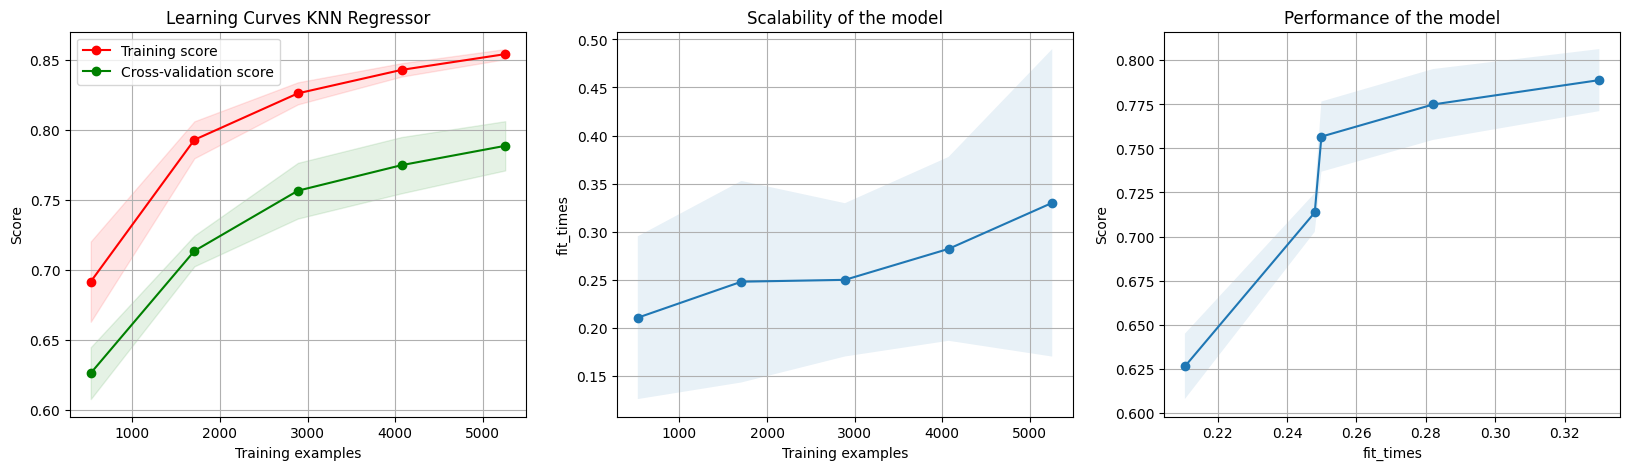

In [178]:
plot_learning_curve(loaded_best_estimator_round5, 'Learning Curves KNN Regressor', X_train, y_train, n_jobs=-1)

In [179]:
print(loaded_best_estimator_round5.score(X_train, y_train))


print(loaded_complete_grid_round5.best_score_)

0.8625969603990726
0.7886958662169146


In [181]:
# Checking the testing score
# Round 2 and Round 3 are providing the best cross validation scores

print(f'Test data accauracy for round 2: {loaded_best_estimator_round2.score(X_test, y_test)}')
print(f'Test data accauracy for round 3: {loaded_best_estimator_round3.score(X_test, y_test)}')

Test data accauracy for round 2: 0.7734144777455342
Test data accauracy for round 3: 0.773196337605399
